## Income Prediction ML Project

Imports

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


Data Exlporation

In [2]:
og_df = pd.read_csv("income.csv")

og_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
og_df.shape

(48842, 15)

In [4]:
og_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
og_df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [6]:
og_df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
og_df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

### One Hot Encoded Version

In [8]:
# Unused function to create dummies (just to try)
def dummify(dataframe, col):
    return (dums := pd.get_dummies(dataframe[col], prefix=str(col)+"_", dtype=int))

In [9]:
df = og_df.copy()

Dummify categorical columns

In [10]:
df.select_dtypes(object).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [11]:
# Drop education column as there is already a 'educational-num' column
df = df.drop('education',axis=1)

After looking online for what the feature "fnlwgt" refers to, I found that it is defined as: Final Weight - The number of people the census believes
the entry represents (int > 0)

Because this is not something that I think would be able to known for a new person X, I will drop this column as well.

In [12]:
df = df.drop('fnlwgt', axis=1)

In [13]:
# Create list of columns to dummify and apply
to_dum = ['workclass', 'marital-status', 'occupation','relationship', 'race', 'native-country']

df = pd.get_dummies(df, columns=to_dum , dtype=int, drop_first=True)

In [14]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,Male,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,Male,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,Male,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,Male,7688,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,Female,0,0,30,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,Female,0,0,38,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,Male,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,Female,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,Male,0,0,20,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Encode gender & income columns

In [15]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [16]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [17]:
df['income'] = df['income'].apply(lambda x: 1 if x=='>50K' else 0)
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)

Determine which features are most correlated with income

<Axes: >

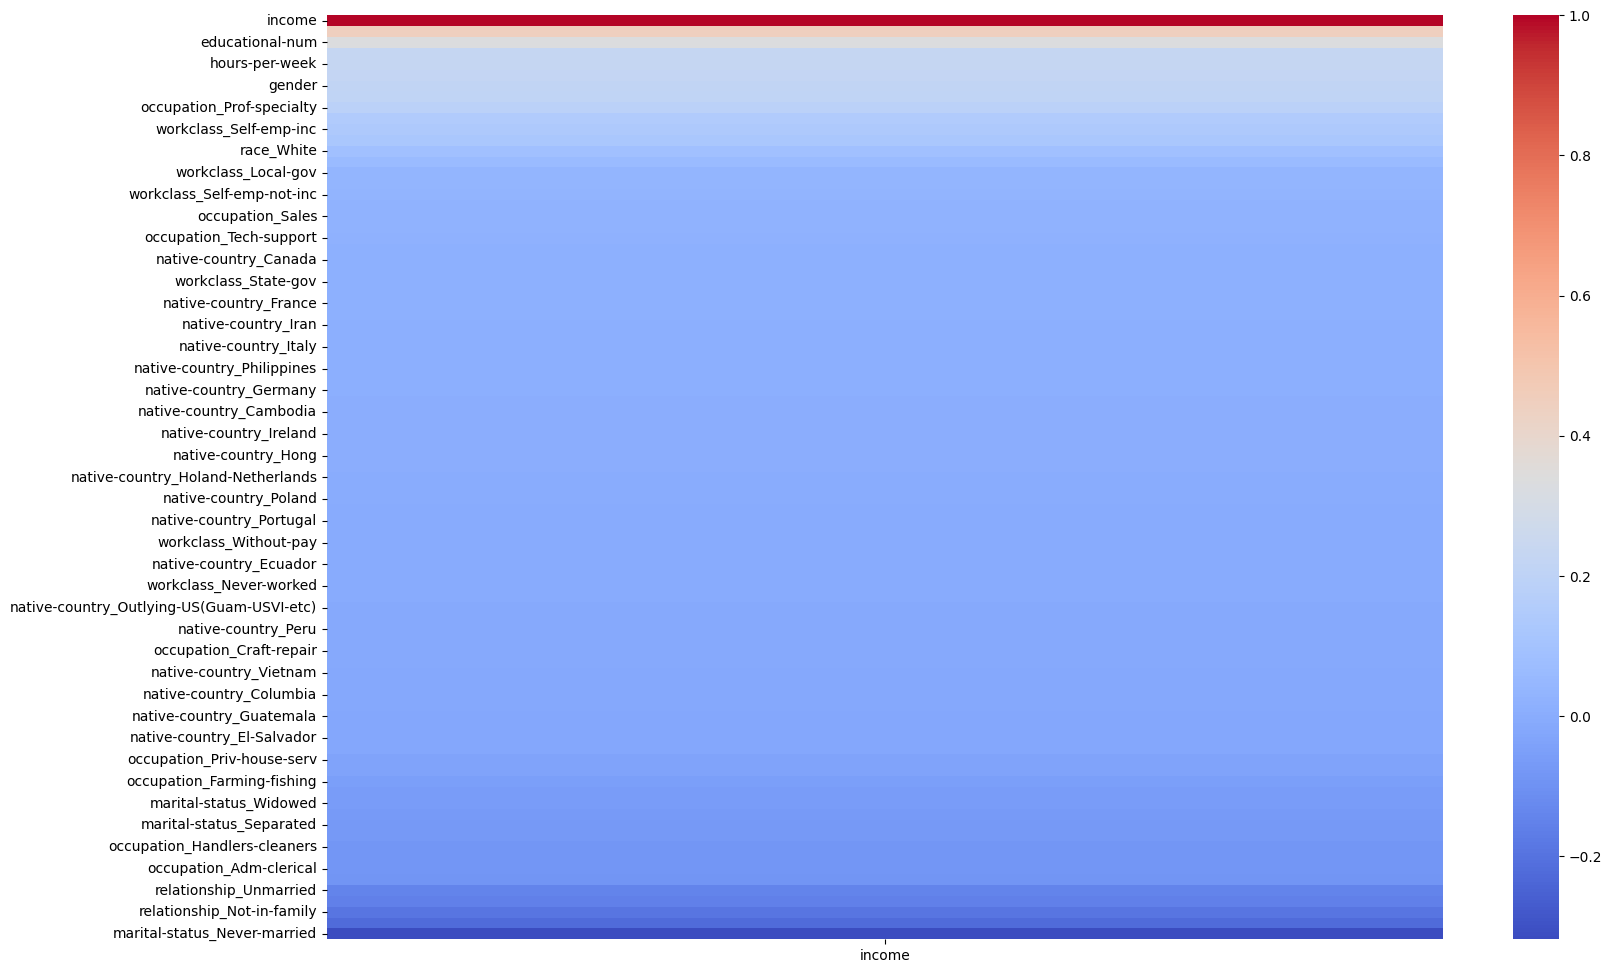

In [18]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr()[["income"]].sort_values(by = "income", ascending = False),
           annot = False,
           cmap = "coolwarm")

<Axes: >

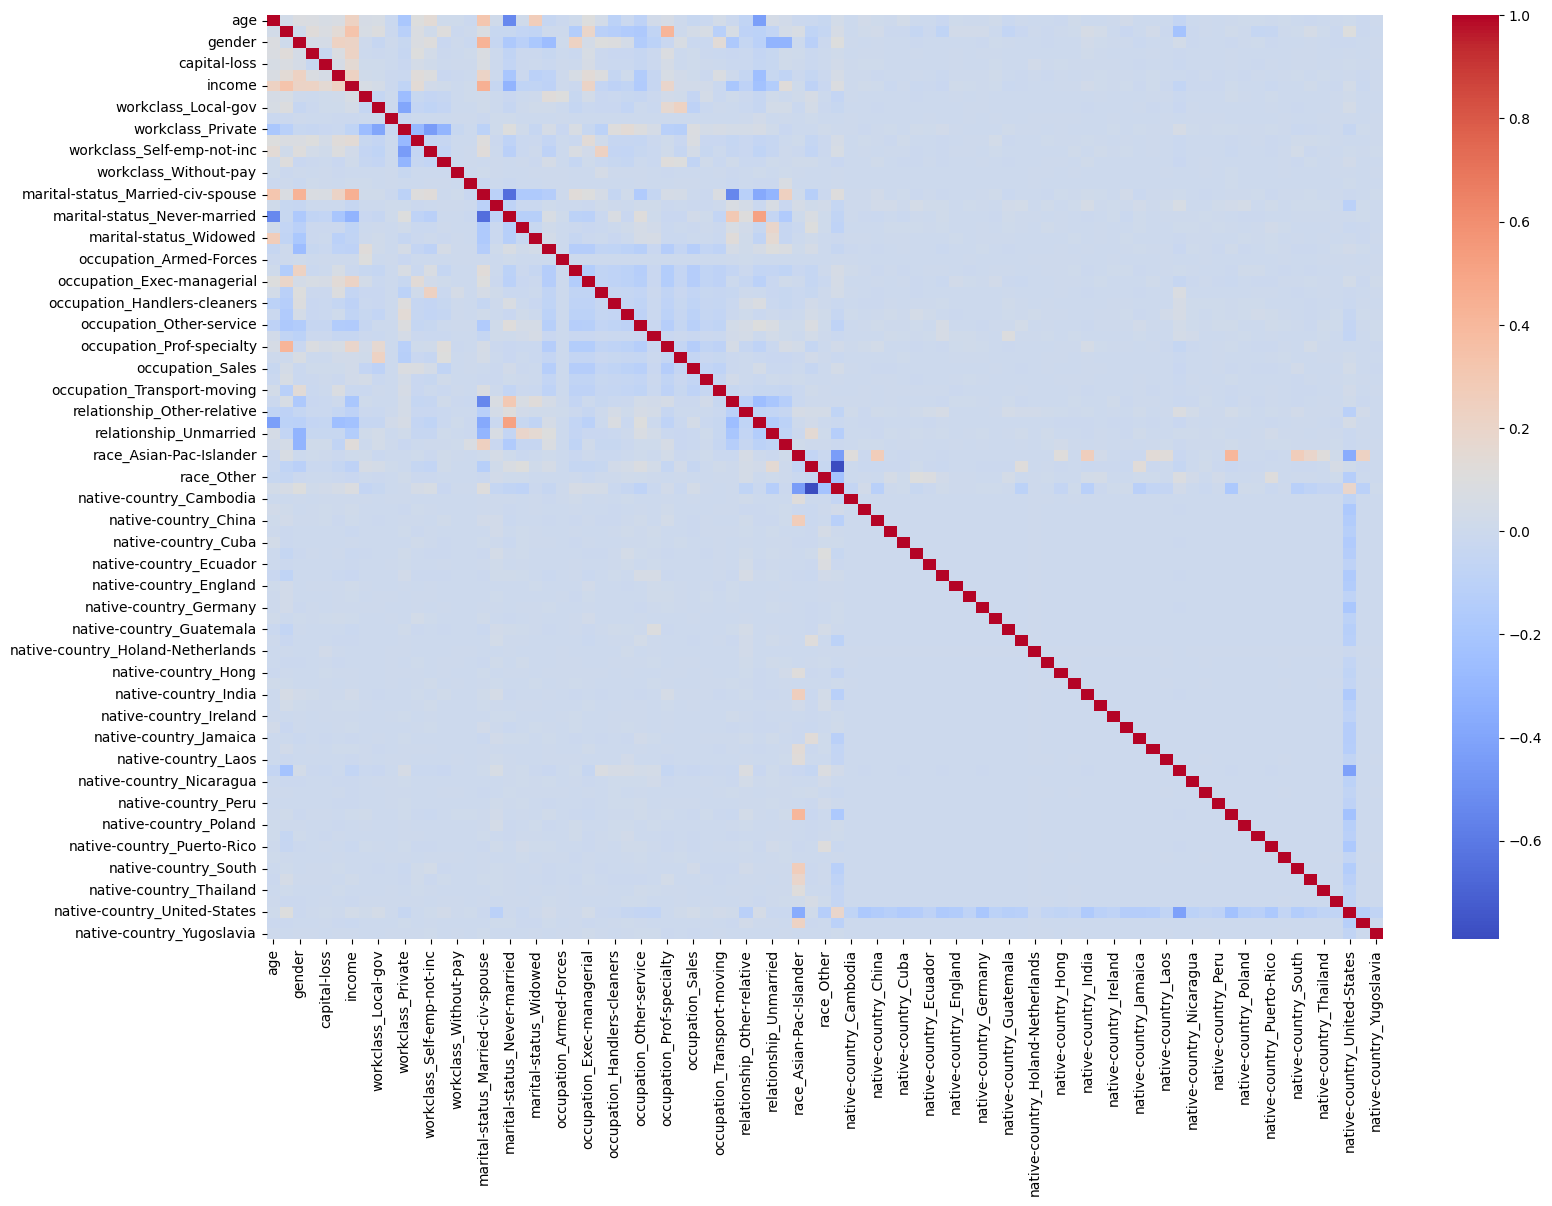

In [19]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot = False, cmap = "coolwarm")

Too many features to get a good impression. Drop 80% of the least correlated features.

In [20]:
# Absolute value of correlations as negatives also important
corrs = df.corr()['income'].abs()
sorted_corrs = corrs.sort_values()
num_cols_to_drop = int(.8*len(df.columns))
cols_to_drop = sorted_corrs.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)



New heatmap with the undropped features

<Axes: >

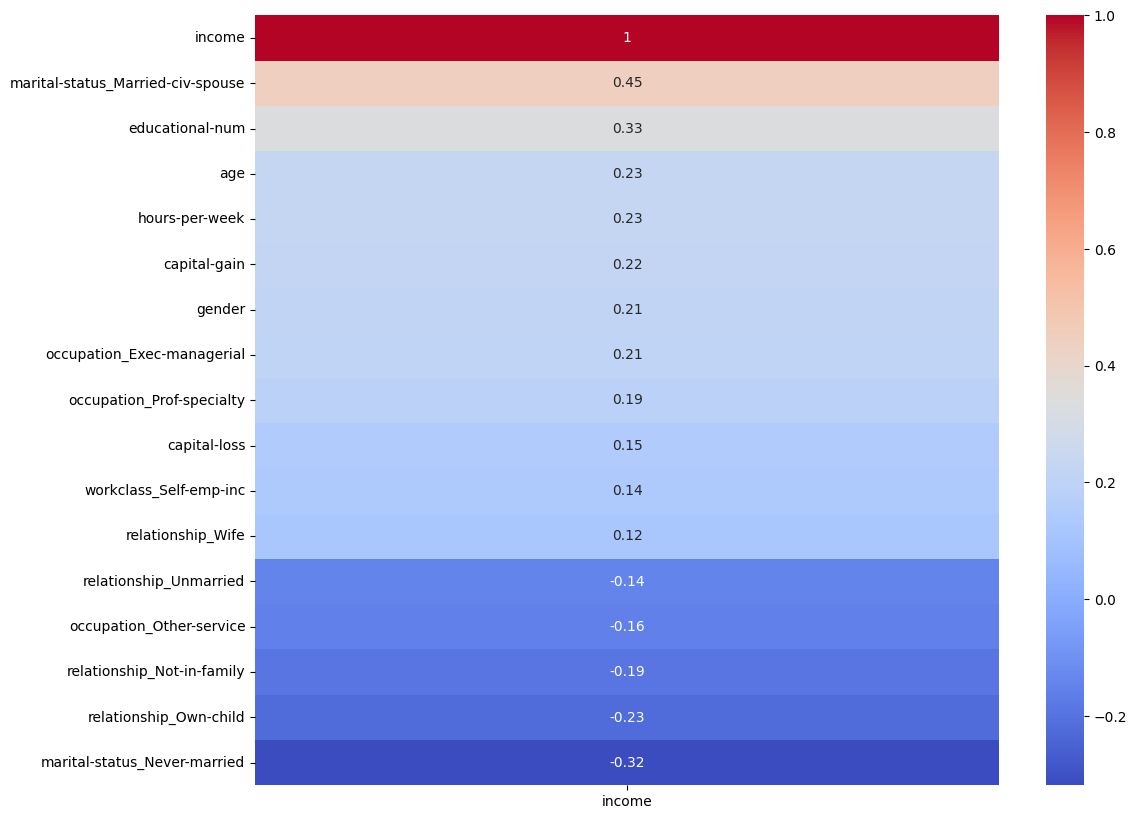

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df_dropped.corr()[["income"]].sort_values(by = "income", ascending = False),
           annot = True,
           cmap = "coolwarm")

## Model Creation

#### Because the features of this dataset is similar to a Decision Tree, we will use the Random Forest forest model first.

In [22]:
# Train Test Split
train_df, test_df = train_test_split(df, test_size=0.2)

In [23]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
26091,24,9,0,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5367,34,13,0,0,0,48,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23689,48,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11205,45,10,1,15024,0,44,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27441,26,10,1,0,0,40,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13971,32,9,1,0,1902,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23691,21,10,1,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41316,49,13,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40542,38,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Split into X,Y data

# Train
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Test
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

In [48]:
forest = RandomForestClassifier()

Fucntion to create dataframe of scores

In [26]:
def get_scores(model, training_df, testing_df, model_name):
    # Start with a list of our different scores
    list1 = ["Confusion_Matrix", "F1_Score", "Accuracy_Score"]
    # create a list with our actual scores
    list2 = [round(model.score(X_train, y_train), 3), 
             round(model.score(X_test, y_test), 3),
             round(cross_val_score(model, training_df, y_train, cv = 5).mean(), 3)]
    # Loop through all 5 cross validations and return the scores on each one.
    for position, i in enumerate(cross_val_score(model, training_df, y_train, cv = 5)):
        # add our new row name
        list1.append(f"Cross Validation, Fold {position + 1}") 
        # add the cross val score
        list2.append(round(i, 3))
        
    score_df = pd.DataFrame(list(zip(list1, list2)), 
               columns =[model_name, 'Score'])
    return score_df

In [49]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
forest.score(X_test,y_test)

0.8474767120483161

Function to create dictionary of feature names/importances (sorted by descending importance)

In [57]:
def get_importances(model):
    importance = dict(zip(model.feature_names_in_,model.feature_importances_))
    importance = {k:v for k,v in sorted(importance.items(), key=lambda x: x[1], reverse=True)}

    return importance

In [58]:
get_importances(forest)

{'age': 0.22966301851860482,
 'educational-num': 0.12495777355192281,
 'hours-per-week': 0.11537711211033772,
 'capital-gain': 0.11442682298707663,
 'marital-status_Married-civ-spouse': 0.10152038045594841,
 'capital-loss': 0.03820037485849656,
 'marital-status_Never-married': 0.03392842245822956,
 'occupation_Exec-managerial': 0.021557373936456414,
 'occupation_Prof-specialty': 0.01965321351152931,
 'relationship_Not-in-family': 0.016591806339313262,
 'gender': 0.01589303883683545,
 'workclass_Private': 0.010243082671832689,
 'relationship_Own-child': 0.009495907796259074,
 'relationship_Wife': 0.00884522063783086,
 'relationship_Unmarried': 0.008353092024706344,
 'occupation_Other-service': 0.007996651790474376,
 'workclass_Self-emp-not-inc': 0.007967961496769758,
 'native-country_United-States': 0.007327259746246146,
 'workclass_Self-emp-inc': 0.0070938352767223704,
 'race_White': 0.006491975206301986,
 'occupation_Craft-repair': 0.006458106565358165,
 'occupation_Sales': 0.00633018

In [37]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### HyperParameter Tuning

In [43]:
param_grid = {
    'n_estimators' : [50, 100, 250],
    'max_depth' : [5, 10, 30, None], 
    'min_samples_split' : [2, 4], 
    'max_features' : ['sqrt', 'log2'],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, verbose=10)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.5s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [45]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

Random Forest Model using best paramaters determined through Grid Search

In [51]:
forest_2 = grid_search.best_estimator_

In [54]:
forest_2.score(X_test, y_test)

#print(f"{(forest_2.score(X_test, y_test) - forest.score(X_test, y_test)).round(3)}% improvement in score")

0.8612959361244754

In [59]:
get_importances(forest_2)

{'age': 0.15800304973621823,
 'capital-gain': 0.13698911279649265,
 'educational-num': 0.1322363191879605,
 'marital-status_Married-civ-spouse': 0.11106206826237182,
 'hours-per-week': 0.0907398988821203,
 'marital-status_Never-married': 0.04763091847921818,
 'capital-loss': 0.04531671513581894,
 'occupation_Exec-managerial': 0.0265769701465026,
 'occupation_Prof-specialty': 0.02361293705945289,
 'relationship_Not-in-family': 0.02290900195396962,
 'gender': 0.02161056259243553,
 'relationship_Own-child': 0.016798805222945936,
 'relationship_Unmarried': 0.010673918644123788,
 'occupation_Other-service': 0.010343049571237037,
 'relationship_Wife': 0.010088552948136424,
 'workclass_Private': 0.009277957735937578,
 'workclass_Self-emp-not-inc': 0.008653309550092981,
 'workclass_Self-emp-inc': 0.008373028416800696,
 'native-country_United-States': 0.0070038257170833475,
 'race_White': 0.006679480449525279,
 'occupation_Sales': 0.00596941173784979,
 'workclass_Federal-gov': 0.005665099057544